In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
from sklearn.datasets.samples_generator import make_blobs


In [2]:
pairs, labels = make_blobs(n_samples=300, cluster_std=1.5, centers=3, n_features=2, random_state=0) #cluster_std=0.25,
pairs[:3]

array([[-0.39296326,  5.97931176],
       [ 0.96687145, -1.17738227],
       [ 2.11782667,  4.48629985]])

In [3]:
def euclidian(a, b):
    return np.linalg.norm(a-b)

In [4]:
def kmeans(dataset, k, max_iterations):
    old_centroids = [] #list to store past centroids
    num_rows, num_columns = dataset.shape #number of rows and columns from the dataset
    current_centroids = dataset[np.random.randint(0, num_rows - 1, size=k)] #randomly choose our initial centroids
    
    old_centroids.append(current_centroids) #set these to our list of past centroid (to show progress over time)
    previous_centroids = np.zeros(current_centroids.shape) #to keep track of centroid at every iteration
    cluster_list = np.zeros((num_rows, 1)) #a null array to hold the assigned cluster of every point in the dataset
    
    for i in range(max_iterations):        
        for row, data_point in enumerate(dataset): #for each row/data point in the dataset
            distance_array = np.zeros((k,1)) #a null array to hold the distances between the X value and our three centroids
            
            for centroid_index, centroid in enumerate(current_centroids): #for each centroid
                distance_array[centroid_index] = euclidian(centroid, data_point) #compute the distance between x and centroid
            
            cluster_list[row, 0] = np.argmin(distance_array) #find the smallest distance, assign that distance to a cluster

        temp_centroid = np.zeros((k, num_columns)) #acts as a buffer while we compute new centroids
        
        for index in range(len(current_centroids)): #for each cluster (k of them)
            points_in_cluster = [i for i in range(len(cluster_list)) if cluster_list[i] == index] #get all the points assigned to a cluster
            centroid = np.mean(dataset[points_in_cluster], axis=0) #find the mean of those points, this is our new centroid
            temp_centroid[index, :] = centroid #add our new centroid to our new temporary list
        
        current_centroids = temp_centroid #set the new list to the current list
        
        old_centroids.append(temp_centroid) #add our calculated centroids to our history for plotting

    return current_centroids, old_centroids, cluster_list 
#Our function computes and returns our centroids with their histories, as well as data point's cluster

In [5]:
def plot(dataset, old_centroids, cluster_list, k):
    list_of_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w'] #list of colors for each cluster
    #it is possible but extremely unlikely that you will have more clusters, and need more colors, than this

    colors = list_of_colors[:k] #take colors for as many clusters as we're using
    
    figure, axis = plt.subplots()

    for index in range(dataset.shape[0]): #for every point in the data set
        points_in_cluster = [i for i in range(len(cluster_list)) if cluster_list[i] == index] #Let's grab every point in the cluster
        for point_index in points_in_cluster: #for each point in cluster
            axis.plot(dataset[point_index][0], dataset[point_index][1], (colors[index] + 'o')) #plot the point with the cluster's color

    centroid_history = [] #null list to hold all of our old centroids for graphing
    for index, centroids in enumerate(old_centroids): #go through our history of centroids from each iteration of the algorithm
        for inner, item in enumerate(centroids): #go through each of our k-number of centroids at each iteration
            if index == 0:
                centroid_history.append(axis.plot(item[0], item[1], 'ko', ms=10)[0]) 
            else:
                centroid_history[inner].set_data(item[0], item[1])
                plt.pause(0.8)
                
    plt.show()

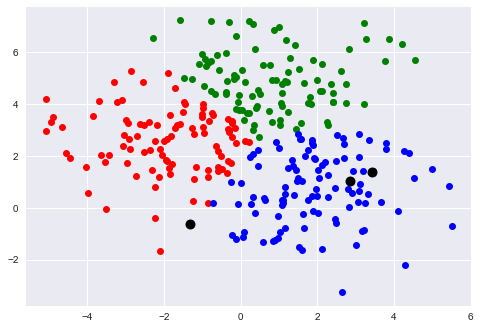

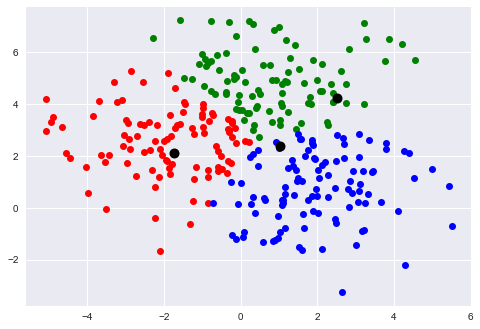

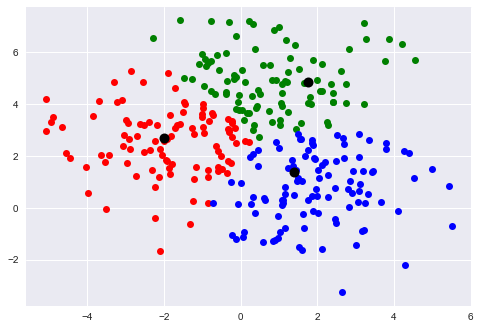

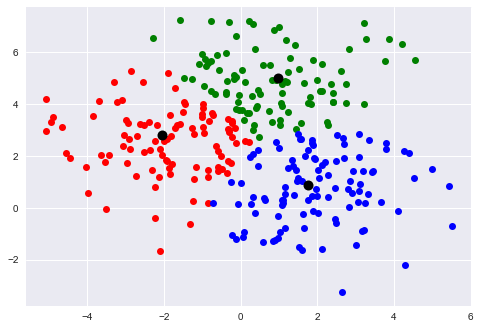

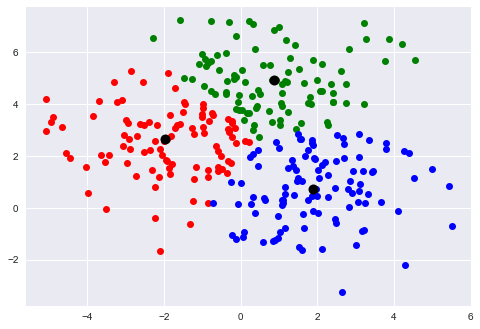

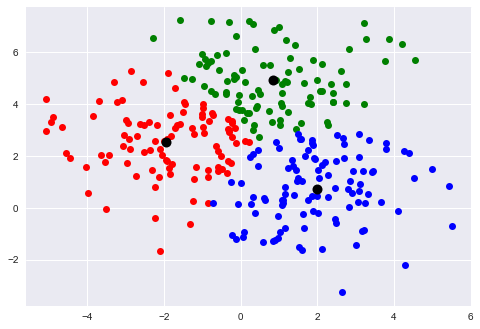

In [7]:
def run(data, k, max_iterations):
    current_centroids, old_centroids, cluster_list = kmeans(data, k, max_iterations)

    for item in old_centroids: #this includes the last one
        plot(data, [item], cluster_list, k)

run(pairs, 3, 5)